In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [64]:
df = pd.read_csv('economic_index.csv')

In [65]:
df.head(5)

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [66]:
# index_price is measure of relative price changes 

In [67]:
df.drop(columns = ['Unnamed: 0', 'year', 'month'], axis = 1, inplace = True)

In [68]:
df.head()
# independent # independent     # dependent

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [69]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

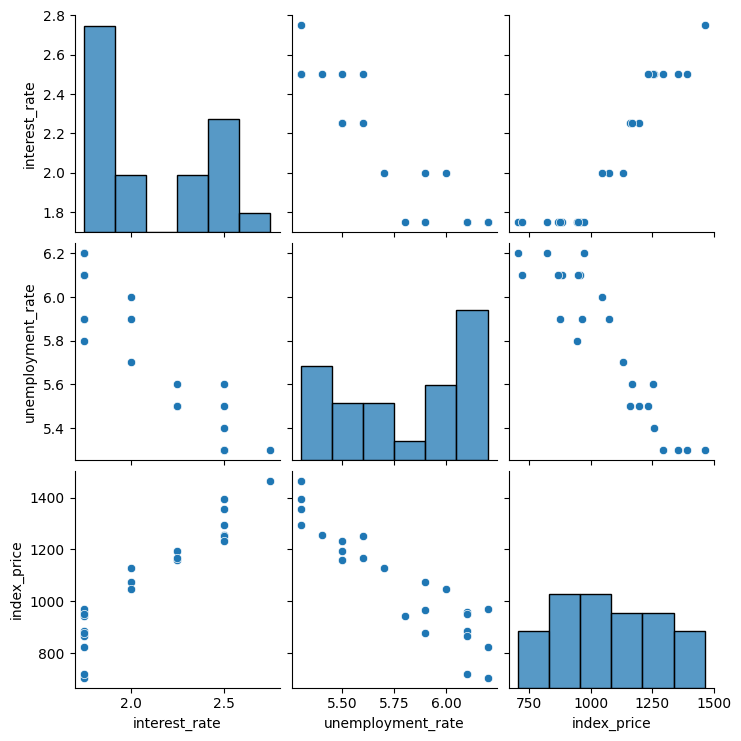

In [70]:
import seaborn as sns
sns.pairplot(df)

In [71]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

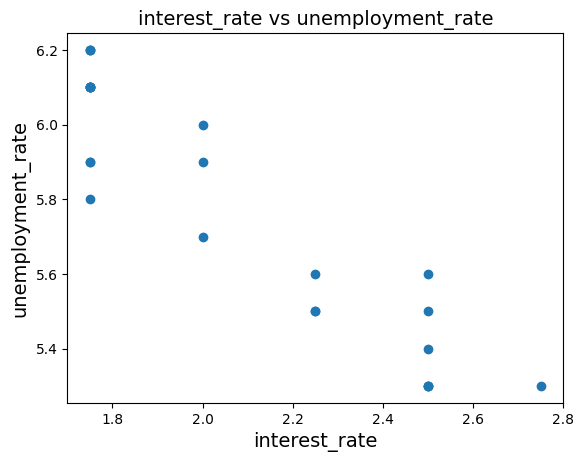

In [72]:
# Visualize datapoints

plt.scatter(df['interest_rate'], df['unemployment_rate'])
plt.title('interest_rate vs unemployment_rate', fontsize = 14)
plt.xlabel('interest_rate', fontsize = 14)
plt.ylabel('unemployment_rate', fontsize = 14)

Text(0, 0.5, 'index_price')

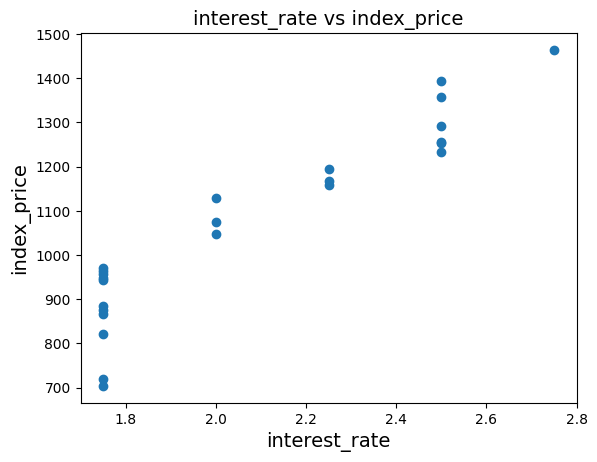

In [73]:
plt.scatter(df['interest_rate'], df['index_price'])
plt.title('interest_rate vs index_price', fontsize = 14)
plt.xlabel('interest_rate', fontsize = 14)
plt.ylabel('index_price', fontsize = 14)

In [74]:
X = df[['interest_rate', 'unemployment_rate']]
#or X = df.iloc[:, :-1].values
y = df['index_price']

In [75]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [76]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [77]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

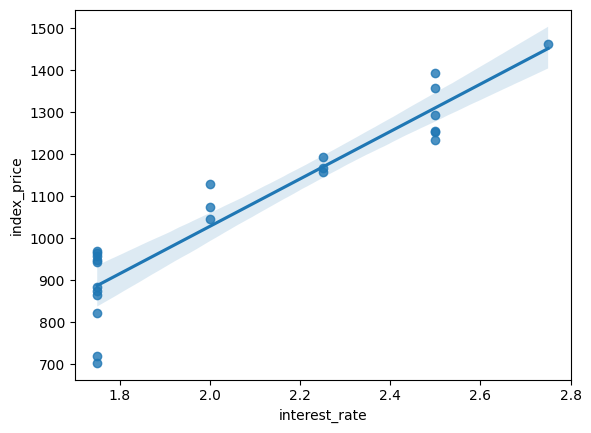

In [78]:
sns.regplot(x = 'interest_rate', y = 'index_price', data = df)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

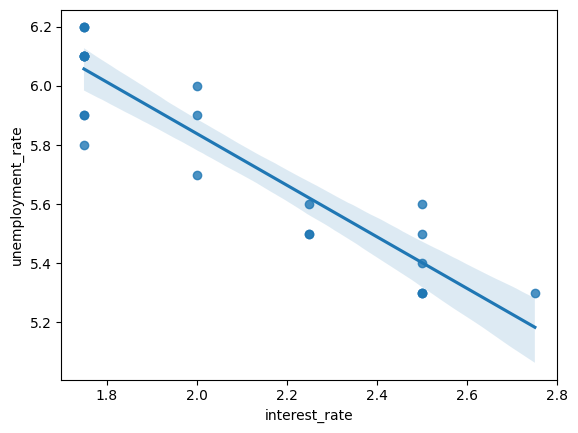

In [79]:
sns.regplot(x = 'interest_rate', y = 'unemployment_rate', data = df)

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

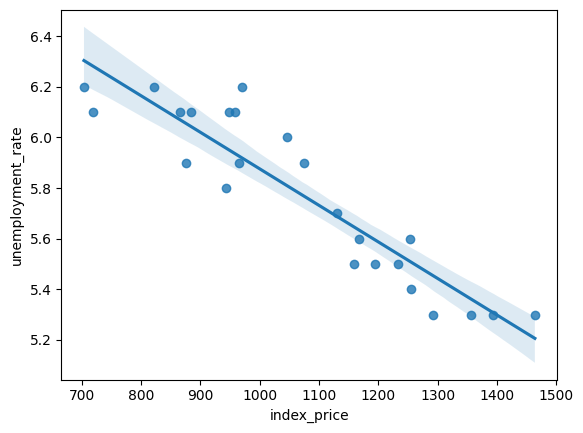

In [80]:
sns.regplot(x = 'index_price', y = 'unemployment_rate', data = df)

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [83]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [86]:
from sklearn.model_selection import cross_val_score
# cross_val_score(estimator, X, y, cv = 5) is used to evaluate the model
# estimator is the model to be evaluated
# X is the data
# y is the target variable
# cv is the number of folds

In [87]:
valiadtion_score = cross_val_score(regression, X_train, y_train, 
                                scoring='neg_mean_squared_error', cv = 3)
# scoring = 'neg_mean_squared_error' is used to evaluate the model using the mean squared error
# cv = 3 is the number of folds i.e. the data is divided into 5 parts
# and the model is trained on 2 parts and validated on 1 part
# check at 22 mins:
# https://www.udemy.com/course/complete-machine-learning-nlp-bootcamp-mlops-deployment/learn/lecture/43986802#overview

In [88]:
valiadtion_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [89]:
np.mean(valiadtion_score)

np.float64(-5914.8281801623925)

In [90]:
# prediction
y_pred = regression.predict(X_test)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [91]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error, root_mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")
print(f"Mean Squared Log Error: {msle}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 5793.7628877125835
Mean Absolute Error: 59.9357815232356
R2 Score: 0.8278978091457141
Mean Squared Log Error: 0.006298187520763096
Root Mean Squared Error: 76.11677139574815


In [92]:
# Adjusted R2 Score
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

n = len(X_test) # number of samples
p = X_test.shape[1] # number of features

adj_r2 = adjusted_r2(r2, n, p)
print(f"Adjusted R2 Score: {adj_r2}")

Adjusted R2 Score: 0.7131630152428567


# Assumptions

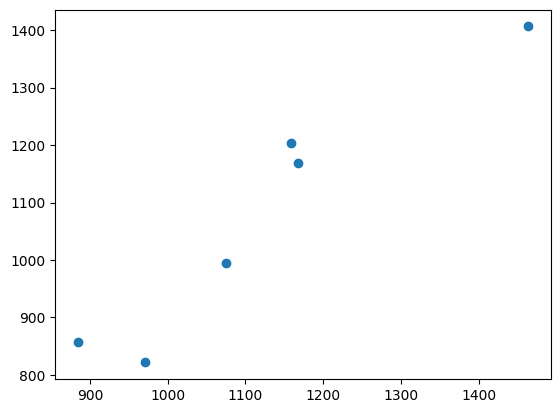

In [93]:
plt.scatter(y_test, y_pred)

In [94]:
residuals = y_test - y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


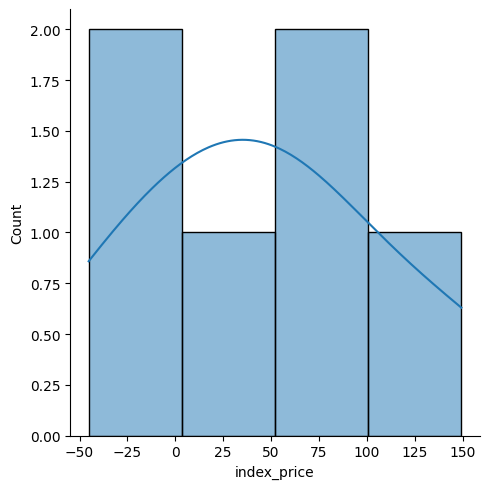

In [97]:
# Plot residuals
sns.displot(residuals, kde = True)

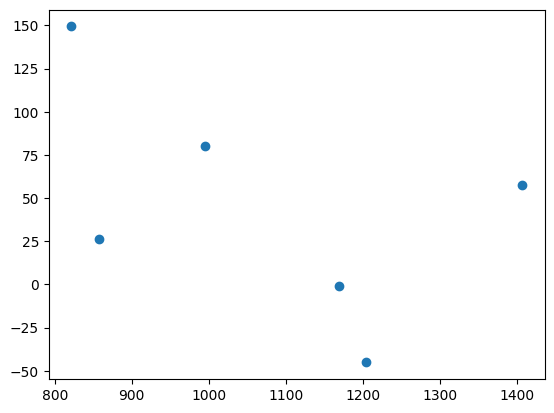

In [98]:
# Scatter wrt predictions and residuals to features
plt.scatter(y_pred, residuals)

In [101]:
print(regression.coef_)

[  88.27275507 -116.25716066]


In [99]:
# OLS Linear Regression
import statsmodels.api as sm

In [100]:
model = sm.OLS(y_train, X_train).fit()
model.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Thu, 10 Oct 2024   Prob (F-statistic):                       0.754
Time:                        16:42:44   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""